# Đồ án cuối kỳ



|    Họ và Tên    |    MSSV    |
| ---------|----------|
| Tạ Tiến Thành Đạt| 1712333    |
| Nguyễn Nhật Hảo| 19120501   |

Link Trello: https://trello.com/b/udLhkMpv/l%E1%BB%8Bch-tr%C3%ACnh

## Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

## Thu thập dữ liệu

Trong đồ án này chúng em sử dụng [bộ dữ liệu](https://www.kaggle.com/altadata/covid19?fbclid=IwAR3bOuHzXvun8UHQd-6xKWAxpz9m_hICvuBF0zXkbWNh4TlorFre7_GyV40) về COVID-19 được public trên Kaggle. Bộ dữ liệu này ghi lại những thông tin số liệu thống kê về đại dịch COVID-19 hằng ngày trên toàn thế giới do Trung tâm Khoa học Hệ thống và Kỹ thuật (CSSE) của Đại học Johns Hopkins (JHU) cung cấp. Sở dĩ nhóm chúng em chọn bộ dữ liệu này cho đồ án bởi như tất cả mọi người đều đã thấy, sự ảnh hưởng mà đại dịch COVID-19 đã gây ra cho thế giới trong hơn 2 năm qua thật sự to lớn. Và chính bản thân những người sinh viên như chúng em cũng đã phải chịu ảnh hưởng nhất định đến việc học việc làm cũng như đời sống. Đó cũng chính là nguồn động lực thúc đẩy chúng em muốn tìm hiểu và phân tích nhiều hơn về đại dịch trong đồ án này.

## Khám phá dữ liệu và tiền xử lý

### **Đọc dữ liệu từ file csv vào dataframe**

In [2]:
df = pd.read_csv('Data/altadatacovid_19.csv')
df

,reported_date,country_region,population,confirmed,active,deaths,recovered,mortality_rate,incident_rate
0,2020-02-24,Afghanistan,38928341.0,1,1,0,0,0.0,0.003
1,2020-02-25,Afghanistan,38928341.0,1,1,0,0,0.0,0.003
2,2020-02-26,Afghanistan,38928341.0,1,1,0,0,0.0,0.003
3,2020-02-27,Afghanistan,38928341.0,1,1,0,0,0.0,0.003
4,2020-02-28,Afghanistan,38928341.0,1,1,0,0,0.0,0.003
...,...,...,...,...,...,...,...,...,...
32606,2020-03-12,occupied Palestinian territory,NaN,0,0,0,0,NaN,NaN
32607,2020-03-14,occupied Palestinian territory,NaN,0,0,0,0,NaN,NaN
32608,2020-03-15,occupied Palestinian territory,NaN,0,0,0,0,NaN,NaN
32609,2020-03-16,occupied Palestinian territory,NaN,0,0,0,0,NaN,NaN


### **Dữ liệu có bao nhiêu dòng và bao nhiêu cột?**

In [3]:
num_rows, num_cols = df.shape
print('số dòng: ', num_rows)
print('số cột: ', num_cols)

số dòng:  32611
số cột:  9


### **Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa
khác nhau không?**

- Theo mô tả và cũng như những gì quan sát được thì mỗi dòng dữ liệu sẽ là một ghi nhận số liệu về thống kê liên quan tới covid mỗi ngày ở mỗi quốc gia. Chưa thấy có điều bất thường nào quá rõ ràng nên ta cần khám phá và quan sát thêm để hiểu thêm về dữ liệu.

### **Dữ liệu có các dòng bị lặp không??**

In [4]:
if True in df.duplicated().unique():
    print('Dữ liệu có các dòng bị lặp')
else:
    print('Dữ liệu không có dòng lặp')

Dữ liệu có các dòng bị lặp


- *quan sát dòng bị lặp*

In [5]:
df[df.duplicated()]

,reported_date,country_region,population,confirmed,active,deaths,recovered,mortality_rate,incident_rate
24084,2020-03-16,Congo,5518092.0,1,1,0,0,0.0,0.018


- Ta sẽ xóa luôn dòng dữ liệu bị lặp này

In [6]:
df = df.drop_duplicates()

### **Mỗi cột có ý nghĩa gì?**

Các cột của bộ dữ liệu được mô tả trên Kaggle như sau:

- reported_date: Covid-19 Report Date

- country_region: Country, region or sovereignty name

- population: Country populations as per United Nations Population Division

- confirmed: Confirmed cases include presumptive positive cases and probable cases

- active: Active cases = total confirmed - total recovered - total deaths

- deaths: Death cases counts

- recovered: Recovered cases counts

- mortality_rate: Number of recorded deaths * 100 / Number of confirmed cases

- incident_rate: Confirmed cases per 100,000 persons

### **Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?**

+ Ta sẽ quan sát kiểu dữ liệu của các cột

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32610 entries, 0 to 32610
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reported_date   32610 non-null  object 
 1   country_region  32610 non-null  object 
 2   population      31465 non-null  float64
 3   confirmed       32610 non-null  int64  
 4   active          32610 non-null  int64  
 5   deaths          32610 non-null  int64  
 6   recovered       32610 non-null  int64  
 7   mortality_rate  32560 non-null  float64
 8   incident_rate   31465 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.5+ MB


- Cột reported_date đang có kiểu dữ liệu là object nên ta sẽ chuyển về kiểu datime

In [8]:
df['reported_date'] = pd.to_datetime(df['reported_date'], format='%Y-%m-%d')

/tmp/ipykernel_285/1860375813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reported_date'] = pd.to_datetime(df['reported_date'], format='%Y-%m-%d')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32610 entries, 0 to 32610
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reported_date   32610 non-null  datetime64[ns]
 1   country_region  32610 non-null  object        
 2   population      31465 non-null  float64       
 3   confirmed       32610 non-null  int64         
 4   active          32610 non-null  int64         
 5   deaths          32610 non-null  int64         
 6   recovered       32610 non-null  int64         
 7   mortality_rate  32560 non-null  float64       
 8   incident_rate   31465 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 2.5+ MB


* Ta thấy có 3 cột dữ liệu bị thiếu giá trị là population, mortality_rate và incident_rate. Trong đó số giá trị bị thiếu ở 2 cột population và incident_rate là ngang nhau. Có thể trong việc này có mỗi liên hệ với nhau. Bên cạnh đó, cột mortality chỉ bị thiếu khá ít dữ liệu. Nhưng ta sẽ tạm chưa bàn tới việc này và để chúng lại ở phần tiền xử lý giá trị thiếu.

### **Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá
trị được phân bố như thế nào?**

- Theo mô tả về dữ liệu và quan sát về kiểu dữ liệu của các cột thì chỉ có cột country_region là thuộc kiểu dữ liệu categorical. Còn lại tất cả các cột khác ta sẽ đều xem xét chúng ở dạng số 

In [10]:
def missing_ratio(s):
    return s.isna().mean() * 100

In [11]:
numerical = ['reported_date', 'population', 'confirmed', 'active',
       'deaths', 'recovered', 'mortality_rate', 'incident_rate']

In [12]:
df[numerical].describe()

,population,confirmed,active,deaths,recovered,mortality_rate,incident_rate
count,3.146500e+04,3.261000e+04,3.261000e+04,32610.000000,3.261000e+04,32560.000000,31465.000000
mean,4.497444e+07,4.205397e+04,1.775545e+04,1934.081447,2.236444e+04,3.219919,150.386300
std,1.573204e+08,2.438026e+05,1.340633e+05,9898.279633,1.228638e+05,4.528648,344.927131
min,8.090000e+02,0.000000e+00,-2.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,2.722291e+06,9.900000e+01,3.100000e+01,1.000000,1.800000e+01,0.476000,2.490000
50%,1.009927e+07,1.196000e+03,4.220000e+02,23.000000,4.400000e+02,1.917000,23.183000
75%,3.286627e+07,1.069125e+04,3.696250e+03,239.000000,4.514250e+03,4.211000,129.181000
max,1.439324e+09,5.701679e+06,3.527116e+06,176802.000000,2.947784e+06,100.000000,4061.283000


- Tỉ lệ giá trị thiếu

In [13]:
missing_ratio(df[numerical])

reported_date     0.000000
population        3.511193
confirmed         0.000000
active            0.000000
deaths            0.000000
recovered         0.000000
mortality_rate    0.153327
incident_rate     3.511193
dtype: float64

### **Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?**

In [14]:
categorical = ['country_region']
df[categorical].value_counts()

country_region          
Republic of Korea           215
United States of America    215
Thailand                    215
Japan                       215
Viet Nam                    214
                           ... 
Ivory Coast                   1
Taipei and environs           1
Cape Verde                    1
North Ireland                 1
China, Macao SAR              1
Length: 220, dtype: int64

- Như vậy có 220 quốc gia được ghi nhận số liệu thống kê trong bộ dữ liệu về covid này. Trong đó những quốc gia như Hàn Quốc, Mỹ,... được ghi nhận với nhiều dòng dữ liệu nhất. Và có một số quốc gia thì ngược lại chỉ có một dòng dữ liệu được ghi nhận. Như những gì ta đã được quan sát thì mỗi dòng dữ liệu cũng tương ứng với một ngày mà dữ liệu về covid ở mỗi quốc gia được ghi nhận.

- Tỉ lệ giá trị thiếu

In [15]:
missing_ratio(df[categorical])

country_region    0.0
dtype: float64

### ***Xử lý giá trị thiếu***

- Giờ ta trở lại với 3 cột dữ liệu có giá trị thiếu đã khám phá ở phía trên. Ta sẽ tìm cách để giải quyết những chỗ bị thiếu này. Nhớ lại những gì đã khám phá và phần mô tả cho dữ liệu thì cột population là dân số của quốc gia, còn cột incident_rate là tỉ lệ số ca mắc được xác nhận trên 100,000 ca. Như vậy có thể việc số giá trị thiếu ở 2 cột này giống nhau là do không có số liệu về dân số để có thể tính được tỉ lệ số ca mắc theo dân số.

- Nếu bằng một cách nào đó tính toán dựa trên dữ liệu để điền vào những giá trị bị thiếu về dân số thì có vẻ sẽ không được khách quan lắm. Nên ở đây em chọn phương án bỏ đi những dòng dữ liệu có cột dân số bị thiếu.

In [16]:
df = df.dropna(subset=['population', 'incident_rate'])
df

,reported_date,country_region,population,confirmed,active,deaths,recovered,mortality_rate,incident_rate
0,2020-02-24,Afghanistan,38928341.0,1,1,0,0,0.000,0.003
1,2020-02-25,Afghanistan,38928341.0,1,1,0,0,0.000,0.003
2,2020-02-26,Afghanistan,38928341.0,1,1,0,0,0.000,0.003
3,2020-02-27,Afghanistan,38928341.0,1,1,0,0,0.000,0.003
4,2020-02-28,Afghanistan,38928341.0,1,1,0,0,0.000,0.003
...,...,...,...,...,...,...,...,...,...
32599,2020-08-19,Zimbabwe,14862927.0,5643,1051,150,4442,2.658,37.967
32600,2020-08-20,Zimbabwe,14862927.0,5745,1069,151,4525,2.628,38.653
32601,2020-08-21,Zimbabwe,14862927.0,5815,1076,152,4587,2.614,39.124
32602,2020-08-22,Zimbabwe,14862927.0,5893,1111,153,4629,2.596,39.649


- Không có gì bất thường.

- Ở cột dữ liệu còn lại bị thiếu là mortality_rate (tỉ lệ tử vong trên số ca mắc) ta có thể tính toán được bằng cách chia dữ liệu ở cột deaths (số ca tử vong) cho cột confirmed (số ca mắc được xác nhận)

*Tuy nhiên khi quan sát lại thì ta thấy ở những dòng còn lại mà bị thiếu giá trị ở cột mortaity thì những cột thông kê khác có liên quan đều bằng 0. Tới đây có 2 suy nghĩ khả dĩ là xóa luôn những dòng bị thiếu này hoặc điền giá trị 0 cho những cột thiếu. Và do cá nhân em cảm giác những dòng này hoàn toàn có thể sẽ cần dùng đến nên em chọn phương án điền vào giá trị 0 cho những ô bị thiếu này*

In [17]:
df[df['mortality_rate'].isna()]

,reported_date,country_region,population,confirmed,active,deaths,recovered,mortality_rate,incident_rate
1384,2020-01-23,Australia,25499881.0,0,0,0,0,NaN,0.0
3975,2020-01-23,Brazil,212559409.0,0,0,0,0,NaN,0.0
6370,2020-01-23,Colombia,50882884.0,0,0,0,0,NaN,0.0
11864,2020-03-19,Greenland,56772.0,0,0,0,0,NaN,0.0
11865,2020-03-20,Greenland,56772.0,0,0,0,0,NaN,0.0
11866,2020-03-21,Greenland,56772.0,0,0,0,0,NaN,0.0
12033,2020-03-18,Guam,168783.0,0,0,0,0,NaN,0.0
12034,2020-03-19,Guam,168783.0,0,0,0,0,NaN,0.0
12035,2020-03-20,Guam,168783.0,0,0,0,0,NaN,0.0
12036,2020-03-21,Guam,168783.0,0,0,0,0,NaN,0.0


In [18]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31465 entries, 0 to 32603
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reported_date   31465 non-null  datetime64[ns]
 1   country_region  31465 non-null  object        
 2   population      31465 non-null  float64       
 3   confirmed       31465 non-null  int64         
 4   active          31465 non-null  int64         
 5   deaths          31465 non-null  int64         
 6   recovered       31465 non-null  int64         
 7   mortality_rate  31465 non-null  float64       
 8   incident_rate   31465 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 2.4+ MB


- Giờ khi đã giải quyết xong các giá trị thiếu. Ta đã có thể tiến đến bước tiếp theo. Nhưng ta sẽ tiến hành thêm việc reset lại index để thuận tiện hơn cho việc xử lý tiếp theo.

In [19]:
df.reset_index()

,index,reported_date,country_region,population,confirmed,active,deaths,recovered,mortality_rate,incident_rate
0,0,2020-02-24,Afghanistan,38928341.0,1,1,0,0,0.000,0.003
1,1,2020-02-25,Afghanistan,38928341.0,1,1,0,0,0.000,0.003
2,2,2020-02-26,Afghanistan,38928341.0,1,1,0,0,0.000,0.003
3,3,2020-02-27,Afghanistan,38928341.0,1,1,0,0,0.000,0.003
4,4,2020-02-28,Afghanistan,38928341.0,1,1,0,0,0.000,0.003
...,...,...,...,...,...,...,...,...,...,...
31460,32599,2020-08-19,Zimbabwe,14862927.0,5643,1051,150,4442,2.658,37.967
31461,32600,2020-08-20,Zimbabwe,14862927.0,5745,1069,151,4525,2.628,38.653
31462,32601,2020-08-21,Zimbabwe,14862927.0,5815,1076,152,4587,2.614,39.124
31463,32602,2020-08-22,Zimbabwe,14862927.0,5893,1111,153,4629,2.596,39.649


## Đặt ra câu hỏi từ dữ liệu

- **Tổng số ca mắc và tử vong mỗi ngày trên thế giới như thế nào?**
- **Số ca cũng như tỉ lệ hồi phục tại từng thời điểm là như thế nào?**

## Phân tích dữ liệu để trả lời câu hỏi

### - ***Tổng số ca mắc và tử vong mỗi ngày trên thế giới như thế nào?***

In [20]:
df_qa1 = df.copy()
df_qa1 = df_qa1.set_index('reported_date').sort_index()
df_qa1_index = df_qa1.index.drop_duplicates()
df_qa1_index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17',
               '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
               '2020-08-22', '2020-08-23'],
              dtype='datetime64[ns]', name='reported_date', length=215, freq=None)

In [21]:
df_qa1 = df_qa1.sum(axis=0, level=0)
df_qa1

,population,confirmed,active,deaths,recovered,mortality_rate,incident_rate
reported_date,,,,,,,
2020-01-22,6.098620e+08,7,7,0,0,0.000,0.011
2020-01-23,1.272873e+09,12,12,0,0,0.000,0.057
2020-01-24,7.783245e+08,23,23,0,0,0.000,0.110
2020-01-25,8.653272e+08,37,37,0,0,0.000,0.183
2020-01-26,9.030693e+08,51,48,0,3,0.000,0.255
...,...,...,...,...,...,...,...
2020-08-19,7.679317e+09,22381012,7278614,787142,14315256,527.028,65551.939
2020-08-20,7.679317e+09,22647807,7332095,793167,14522545,525.474,66184.279
2020-08-21,7.679317e+09,22917575,7426921,798661,14691993,521.801,66874.916


In [22]:
total_confirmed = df_qa1['confirmed'].values.copy()
total_confirmed[1:] = total_confirmed[:-1]
total_confirmed[0] = 0

total_deaths = df_qa1['deaths'].values.copy()
total_deaths[1:] = total_deaths[:-1]
total_deaths[0] = 0

In [23]:
df_qa1['daily_confirmed'] = df_qa1['confirmed'].values - total_confirmed 
df_qa1['daily_deaths'] = df_qa1['deaths'].values - total_deaths 
df_qa1

,population,confirmed,active,deaths,recovered,mortality_rate,incident_rate,daily_confirmed,daily_deaths
reported_date,,,,,,,,,
2020-01-22,6.098620e+08,7,7,0,0,0.000,0.011,7,0
2020-01-23,1.272873e+09,12,12,0,0,0.000,0.057,5,0
2020-01-24,7.783245e+08,23,23,0,0,0.000,0.110,11,0
2020-01-25,8.653272e+08,37,37,0,0,0.000,0.183,14,0
2020-01-26,9.030693e+08,51,48,0,3,0.000,0.255,14,0
...,...,...,...,...,...,...,...,...,...
2020-08-19,7.679317e+09,22381012,7278614,787142,14315256,527.028,65551.939,273056,6758
2020-08-20,7.679317e+09,22647807,7332095,793167,14522545,525.474,66184.279,266795,6025
2020-08-21,7.679317e+09,22917575,7426921,798661,14691993,521.801,66874.916,269768,5494


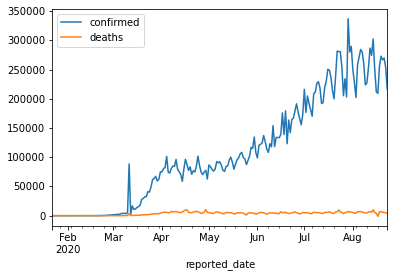

In [24]:
df_qa1['daily_confirmed'].plot.line(label='confirmed')
df_qa1['daily_deaths'].plot.line(label='deaths')
plt.pyplot.legend();

- **Nhìn vào biểu đồ thì ta có thể thấy một điều là thỉ lệ tử vong có xu hương giảm dần theo thời gian. Bởi vì số ca mắc tuy có xu hướng tăng nhưng số ca tử vong có vẽ như được giữ ở mức ổn định, thậm chí là có xu hướng giảm**

- **Để có thể nhận xét chính xác hơn ta sẽ tiếp tục tính và vẽ biểu đồ thể hiện về sự biến thiên của tỉ lệ tử vong theo ngày**

In [25]:
df_qa1['mortality_rate_of_world'] = df_qa1['deaths'].values / \
                        df_qa1['confirmed'].values * 100

df_qa1['daily_mortality_rate'] = df_qa1['daily_deaths'].values /\
                        df_qa1['daily_confirmed'].values * 100
df_qa1                                

,population,confirmed,active,deaths,recovered,mortality_rate,incident_rate,daily_confirmed,daily_deaths,mortality_rate_of_world,daily_mortality_rate
reported_date,,,,,,,,,,,
2020-01-22,6.098620e+08,7,7,0,0,0.000,0.011,7,0,0.000000,0.000000
2020-01-23,1.272873e+09,12,12,0,0,0.000,0.057,5,0,0.000000,0.000000
2020-01-24,7.783245e+08,23,23,0,0,0.000,0.110,11,0,0.000000,0.000000
2020-01-25,8.653272e+08,37,37,0,0,0.000,0.183,14,0,0.000000,0.000000
2020-01-26,9.030693e+08,51,48,0,3,0.000,0.255,14,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-19,7.679317e+09,22381012,7278614,787142,14315256,527.028,65551.939,273056,6758,3.517008,2.474950
2020-08-20,7.679317e+09,22647807,7332095,793167,14522545,525.474,66184.279,266795,6025,3.502180,2.258288
2020-08-21,7.679317e+09,22917575,7426921,798661,14691993,521.801,66874.916,269768,5494,3.484928,2.036565


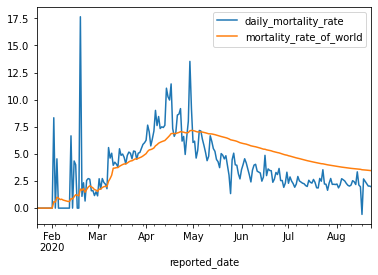

In [26]:
df_qa1['daily_mortality_rate'].plot.line(label='daily_mortality_rate')
df_qa1['mortality_rate_of_world'].plot.line(label='mortality_rate_of_world')
plt.pyplot.legend();

- Biểu đồ này đã cho ta cái nhìn rõ hơn hơn về tỉ lệ tử vong vì covid trên thế giới.
- Đường xanh biểu thị cho tỉ lệ tử vong theo ngày, và đường đỏ biểu thị cho tỉ lệ tử vong trên tổng số ca mắc tích lũy
- Rõ ràng là tỉ lệ tử vong đã dần đươc giảm xuống theo thời gian. Thật khủng khiếp khi ở giai đoạn đầu bùng phát dịch đã có thời điểm tỉ lệ tử vong trong một ngày trên thế giới đạt đến mốt hơn 17.5%. Nhưng thật may mắn là chúng ta đã có thể nhanh chóng cải thiện tình hình

### - ***Số ca cũng như tỉ lệ hồi phục tại các thời điểm là như thế nào so với số ca mắc mới?***

Trước tiên để gọn ta chỉ lấy một số cột cần thiết sử dụng để trả lời cho câu hỏi này

In [37]:
df_qa2 = df_qa1.drop(columns=['population', 'daily_mortality_rate', 'mortality_rate_of_world'])
df_qa2

,confirmed,active,deaths,recovered,mortality_rate,incident_rate,daily_confirmed,daily_deaths
reported_date,,,,,,,,
2020-01-22,7,7,0,0,0.000,0.011,7,0
2020-01-23,12,12,0,0,0.000,0.057,5,0
2020-01-24,23,23,0,0,0.000,0.110,11,0
2020-01-25,37,37,0,0,0.000,0.183,14,0
2020-01-26,51,48,0,3,0.000,0.255,14,0
...,...,...,...,...,...,...,...,...
2020-08-19,22381012,7278614,787142,14315256,527.028,65551.939,273056,6758
2020-08-20,22647807,7332095,793167,14522545,525.474,66184.279,266795,6025
2020-08-21,22917575,7426921,798661,14691993,521.801,66874.916,269768,5494


In [43]:
total_recovered = df_qa1['recovered'].values.copy()
total_recovered	[1:] = total_recovered	[:-1]
total_recovered	[0] = 0

In [40]:
df_qa2['daily_recovered'] = df_qa2['recovered'].values - total_recovered
df_qa2

,confirmed,active,deaths,recovered,mortality_rate,incident_rate,daily_confirmed,daily_deaths,daily_recovered
reported_date,,,,,,,,,
2020-01-22,7,7,0,0,0.000,0.011,7,0,0
2020-01-23,12,12,0,0,0.000,0.057,5,0,0
2020-01-24,23,23,0,0,0.000,0.110,11,0,0
2020-01-25,37,37,0,0,0.000,0.183,14,0,0
2020-01-26,51,48,0,3,0.000,0.255,14,0,3
...,...,...,...,...,...,...,...,...,...
2020-08-19,22381012,7278614,787142,14315256,527.028,65551.939,273056,6758,217088
2020-08-20,22647807,7332095,793167,14522545,525.474,66184.279,266795,6025,207289
2020-08-21,22917575,7426921,798661,14691993,521.801,66874.916,269768,5494,169448


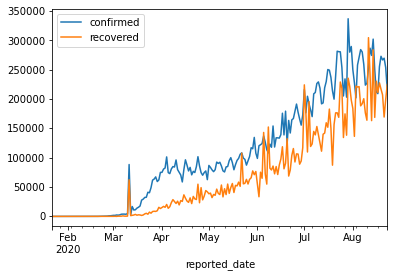

In [42]:
df_qa2['daily_confirmed'].plot.line(label='confirmed')
df_qa2['daily_recovered'].plot.line(label='recovered')
plt.pyplot.legend();

Theo quan sát thì tuy số ca hồi phục mỗi ngày vẫn thấp hơn nhưng đang dần bắt kịp so với số ca mắc. 
Điều này có thể là một dấu hiệu cho thấy thời điểm đỉnh dịch sắp tới

## Tổng kết và nhìn lại quá trình làm đồ án

- Qua đồ án này, nhóm chúng em có thêm cơ hội để ôn tập và rèn luyện những kỹ năng đã được tiếp thu trong môn học này để có thể áp dụng cho việc học cũng như cônng việc tiếp theo sau khi kết thúc môn học.
- Những kết quả được thu được qua dữ liệu cũng giúp nhóm chúng em hoàn thành được những mục tiêu ban đầu mà mình đã đặt ra đó là hiểu hơn về dịch covid.
- Từ những kết quả đã đạt được đó, giúp chúng em có thêm sự thích thú đối với khoa học dữ liệu, nhờ đó có thêm động lực để theo đuổi ngành nghề.
- Bên cạnh những điều tích cực đã đạt được thì từ đồ án này cũng giúp chúng em nhận ra những hạn chế của bản thân mình trong phương hướng học tập, trong phong cách hoạt động nhóm khiến hiểu quả làm việc chưa được tốt nhất.
- Tuy đã rất cố gắng nhưng trong đồ án vẫn còn những hạn chế nhất định. Nhóm sẽ nhìn nhận lại và cố gắng phát huy tốt hơn ở những công việc trong tương lại.